# Graph manipulation with NetworkX

Based on [this post](https://www.datacamp.com/community/tutorials/networkx-python-graph-tutorial).

In [28]:
import networkx as nx
import matplotlib.pyplot as plt
import yaml

In [29]:
with open('modules.yml') as modules:
    deps = yaml.load(modules)
    
print(deps)

{'modules': [{'name': 'A', 'version': 1.0, 'depends': ['B', 'C']}, {'name': 'D', 'version': '1.41.23', 'depends': ['C']}, {'name': 'C', 'version': 0.99}, {'name': 'B', 'version': 2.3, 'depends': ['C']}]}


In [30]:
g = nx.DiGraph(name="Dependencies", source="modules.yml")

for module in deps['modules']:
    name = module.get('name')
    print("Adding dependecies for", name)
    for dep in module.get('depends', []):
        print("...", dep)
        g.add_edge(name, dep)
    
    # TODO: Add version as the attribute for each node.
    g.node[name]['version'] = module.get('version')
        
print(g.nodes(data=True))
print(g.edges())

Adding dependecies for A
... B
... C
Adding dependecies for D
... C
Adding dependecies for C
Adding dependecies for B
... C
[('A', {'version': 1.0}), ('B', {'version': 2.3}), ('C', {'version': 0.99}), ('D', {'version': '1.41.23'})]
[('A', 'B'), ('A', 'C'), ('B', 'C'), ('D', 'C')]


# Draw the Dependency graph

Using `matplotlib` we can draw the graph, with node labels and arrowheads (well, or something that resembles them).

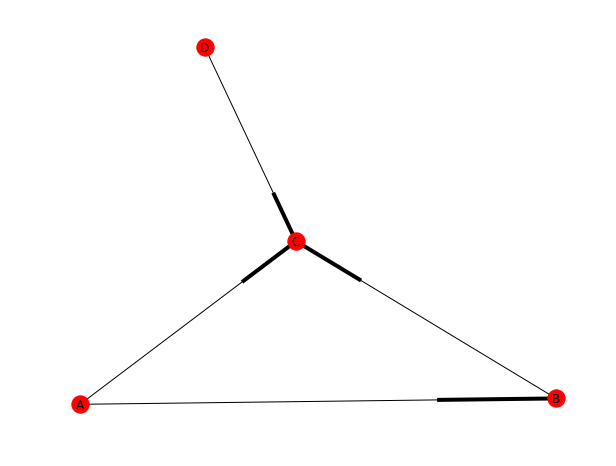

In [31]:
# There's only so many times I'm going to tolerate a deprecation warning...
import warnings
warnings.filterwarnings('ignore')

plt.figure(figsize=(8, 6))
nx.draw(g, with_labels=True, arrows=True)
plt.show()

# Analyzing the Dependency graph

In [32]:
# Check that this is a DAG
if nx.is_directed_acyclic_graph(g):
    print("all is well, we have a DAG")
else:
    raise ValueError("Found a cycle: {}".format(cycle))
    
print("This is the build plan: {}".format(nx.topological_sort(g, reverse=True)))

all is well, we have a DAG
This is the build plan: ['C', 'B', 'A', 'D']
